# Problem 4: Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate and plot a dataset based on  

$$
y(x) = e^{3x}\dfrac{\sin(3\pi^2(x-0.5))}{3\pi^2(x-0.5)}
$$

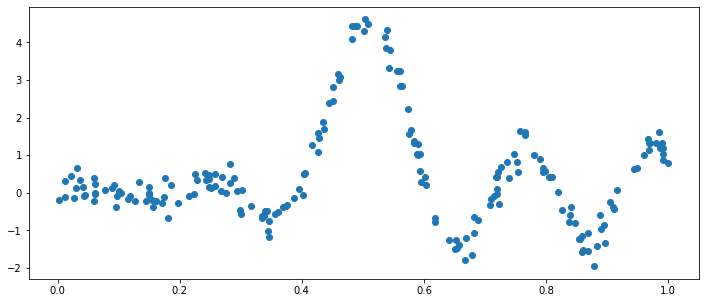

In [2]:
m = 200
x = np.random.rand(m)

num = np.sin(3*np.pi**2*(x-0.5)) # numerator
den = 3*np.pi**2*(x-0.5) # denominator
y = np.exp(3*x)*num/den + 0.25*np.random.randn(m) # function + noise

plt.figure(figsize=(12,5))
plt.plot(x,y,'o')

## Part 1

Fit a polynomial to the datapoints (do not regularize your polynomial model).
Explain how you selected the degree of the fitted polynomial.

I chose degree 13 because all degrees less than 13 were a poor fit as degrees over 13 were obviously over fitted.

In [3]:
# your code here
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

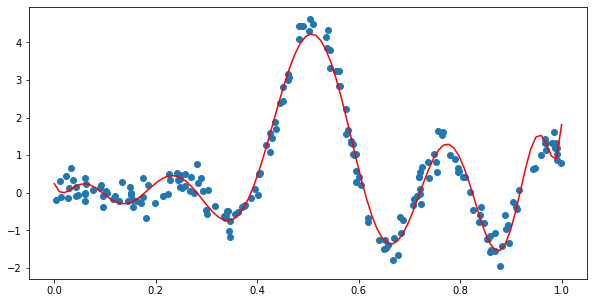

In [4]:
d=13
Xpoly = build_poly_features(x,degree=d)
# solve least squares problem
theta = np.linalg.lstsq(Xpoly,y,rcond=None)[0]
# plot datapoints 
plt.figure(figsize=(10,5))
plt.scatter(x,y, label='training set')
# plot fitted model   
m_plot = 100  
x_plot = np.linspace(0,1,m_plot) 
X_plot_poly = build_poly_features(x_plot,degree=d)
y_plot = X_plot_poly.dot(theta)
plt.plot(x_plot,y_plot,'r',label='fitted model')

## Part 2

Fit a degree-100 polynomial to the datapoints. But this time add a regularization term. Explain how you selected the regularization constant.

# you code here
I chose a very small regularization constanst because as the constant grew the fit would become over fitted.

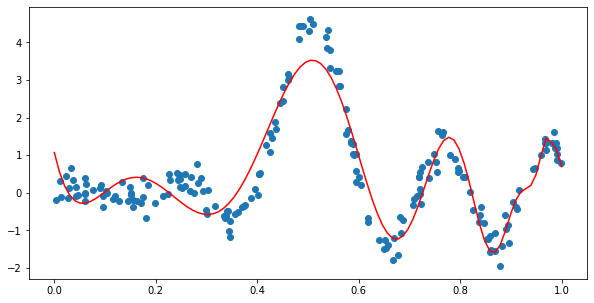

In [8]:
d=100
C = .00000001 # regularization constant

# polyfeatures
Xpoly = build_poly_features(x,degree=d)

# solve regularized least squares problem'
theta = np.linalg.solve(Xpoly.T.dot(Xpoly)+C*np.identity(d+1), Xpoly.T.dot(y))
# plot datapoints 
plt.figure(figsize=(10,5))
plt.scatter(x,y, label='training set')
# plot fitted model   
m_plot = 100  
x_plot = np.linspace(0,1,m_plot) 
X_plot_poly = build_poly_features(x_plot,degree=d)
y_plot = X_plot_poly.dot(theta)
plt.plot(x_plot,y_plot,'r',label='fitted model')